# ENV/ATM 415: Climate Laboratory

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 13: Insolation

## Contents

1. [Some basics](#section1)
2. [Computing daily insolation with `climlab`](#section2)
3. [Global, seasonal distribution of insolation](#section3)

____________
<a id='section1'></a>

## 1. Some basics
____________


So far we’ve been working with a model of the **global mean temperature**. We will soon be adding some x and y dependence – thinking about the equator-to-pole structure of climate.

In order to do this, we have to first start thinking about the spatial structure of the incoming solar radiation.

Draw sketch: 

- big sun on one side of board, order $10^{24}$ W  = yotta watt (YW) of energy output.
- At other end draw small Earth.
- Energy received in a perpendicular cross-section is $S_0 = 1366$ W m$^{-2}$.
- Area of sphere is $4 \pi a^2$ ($a$ is radius of Earth, $a = 6.4 \times 10^6$ m)
- Area of illuminated cross-section is $\pi a^2$.

Global mean insolation = total energy received by planet / surface area of planet:

$$ Q = \frac{S_0 \pi a^2 }{4 \pi a^2 } = \frac{S_0}{4} = 341 \text{ W m}^{-2} $$

That’s what we’ve been using so far, because we’ve only been treating the global average climate.


### Diurnal cycle

- Earth spins around on its axis once per day, so the sub-solar point moves from east to west in longitude. 
- Every **longitude** at the same latitude receives the **same insolation** once we **average over 1 day**. 
- We are going to think strictly about the daily average.

### Seasonal cycle

From the geometry of the sphere we see that the sunlight is NOT AT ALL evenly distributed in latitude.

Draw sketches of the orientation of the Earth’s axis relative to the sun at:

-	NH winter solstice
-	NH summer solstice
-	Equinox
-	Today

Make sure it’s clear that **seasons are primarily associated with the tilt of the axis**!

Current obliquity is about 23.5º

____________
<a id='section2'></a>

## 2. Computing daily insolation with `climlab`
____________

Here are some examples calculating daily average insolation at different locations and times.

These all use a function called 
```
daily_insolation
``` 
in the package 
```
climlab.solar.insolation
``` 
to do the calculation. The code implements the above formulas to calculates daily average insolation anywhere on Earth at any time of year.

The code takes account of *orbital parameters* to calculate current Sun-Earth distance.  

We can look up *past orbital variations* to compute their effects on insolation using the package 
```
climlab.solar.orbital
```
See the [next lecture](Lecture13%20--%20Orbital%20variations.ipynb)!

### Using the `daily_insolation` function

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const
from climlab.solar.insolation import daily_insolation

First, get a little help on using the `daily_insolation` function:

In [2]:
help(daily_insolation)

Help on function daily_insolation in module climlab.solar.insolation:

daily_insolation(lat, day, orb={'ecc': 0.017236, 'long_peri': 281.37, 'obliquity': 23.446}, S0=1365.2, day_type=1)
    Compute daily average insolation given latitude, time of year and orbital parameters.
    
    Orbital parameters can be computed for any time in the last 5 Myears with
    :func:`~climlab.solar.orbital.OrbitalTable.lookup_parameters` (see example below).
    
    
    **Function-call argument** 
    
    
    :param array lat:       Latitude in degrees (-90 to 90).
    :param array day:       Indicator of time of year. See argument ``day_type``
                            for details about format.
    :param dict orb:        a dictionary with three members (as provided by
                            :class:`~climlab.solar.orbital.OrbitalTable`)
    
                            * ``'ecc'`` - eccentricity
    
                                * unit: dimensionless
                                * def

Here are a few simple examples.

First, compute the daily average insolation at 45ºN on January 1:

In [3]:
daily_insolation(45,1)

123.9532155180746

Same location, July 1:

In [4]:
daily_insolation(45,181)

482.356497522712

We could give an array of values. Let's calculate and plot insolation at all latitudes on the spring equinox = March 21 = Day 80

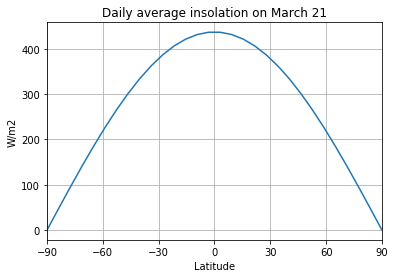

In [5]:
lat = np.linspace(-90., 90., 30)
Q = daily_insolation(lat, 80)
fig, ax = plt.subplots()
ax.plot(lat,Q)
ax.set_xlim(-90,90); ax.set_xticks([-90,-60,-30,-0,30,60,90])
ax.set_xlabel('Latitude')
ax.set_ylabel('W/m2')
ax.grid()
ax.set_title('Daily average insolation on March 21');

### In-class exercises

Try to answer the following questions **before reading the rest of these notes**.

1. What is the daily insolation today here at Albany (latitude 42.65ºN)?
2. What is the **annual mean** insolation at the latitude of Albany?
3. At what latitude and at what time of year does the **maximum daily insolation** occur?
4. What latitude is experiencing either **polar sunrise** or **polar sunset** today?

____________
<a id='section3'></a>

## 3. Global, seasonal distribution of insolation
____________

Calculate an array of insolation over the year and all latitudes (for present-day orbital parameters). We'll use a dense grid in order to make a nice contour plot

In [6]:
lat = np.linspace( -90., 90., 500 )
days = np.linspace(0, const.days_per_year, 365 )
Q = daily_insolation( lat, days )

And make a contour plot of Q as function of latitude and time of year.

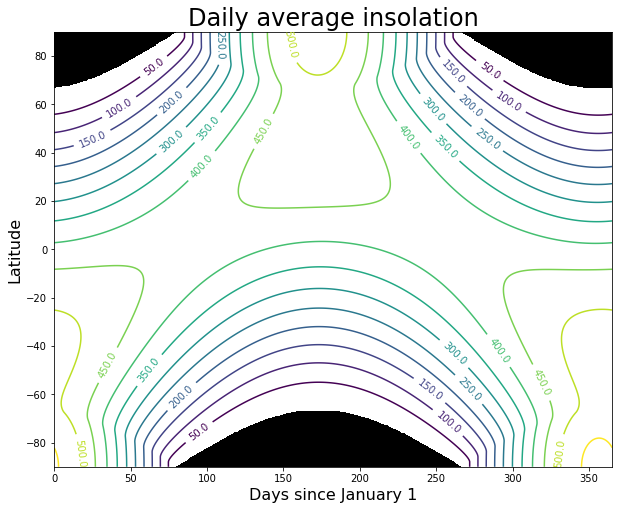

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
CS = ax.contour( days, lat, Q , levels = np.arange(0., 600., 50.) )
ax.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax.set_xlabel('Days since January 1', fontsize=16 )
ax.set_ylabel('Latitude', fontsize=16 )
ax.set_title('Daily average insolation', fontsize=24 )
ax.contourf ( days, lat, Q, levels=[-1000., 0.], colors='k' )

### Time and space averages

Take the area-weighted global, annual average of Q...

In [8]:
Qaverage = np.average(np.mean(Q, axis=1), weights=np.cos(np.deg2rad(lat)))
print( 'The annual, global average insolation is %.2f W/m2.' %Qaverage)

The annual, global average insolation is 341.38 W/m2.


Also plot the zonally averaged insolation at a few different times of the year:

Text(0.5,1,'Daily average insolation')

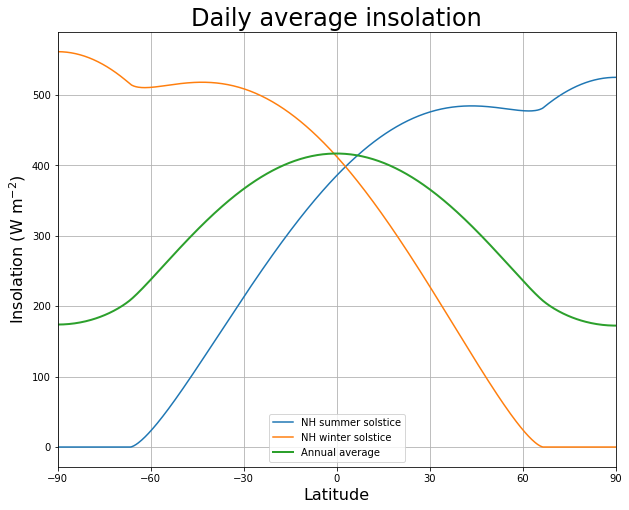

In [9]:
summer_solstice = 170
winter_solstice = 353
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(lat, Q[:, summer_solstice], label='NH summer solstice')
ax.plot(lat, Q[:, winter_solstice], label='NH winter solstice')
ax.plot( lat, np.mean(Q, axis=1), linewidth=2, label='Annual average')
ax.set_xbound(-90, 90)
ax.set_xticks( range(-90,100,30) )
ax.set_xlabel('Latitude', fontsize=16 );
ax.set_ylabel('Insolation (W m$^{-2}$)', fontsize=16 );
ax.grid(); ax.legend();
ax.set_title('Daily average insolation', fontsize=24)